In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. pandas 라이브러리를 사용해서 csv파일 읽기

In [94]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [95]:
# 리턴형은 DataFrame
print(type(train_df))

<class 'pandas.core.frame.DataFrame'>


In [96]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.1 행, 열 출력

In [97]:
#891행 12열(12차원)
train_df.shape

(891, 12)

## 1.2 유실된 데이터 확인

In [98]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [99]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. 데이터 시각화

## 2.1 생존/사망 수를 화면에 출력

In [100]:
# 리턴형은 Series
r = train_df['Survived'].value_counts()
print(type(r))
r

<class 'pandas.core.series.Series'>


0    549
1    342
Name: Survived, dtype: int64

## 2.2 생존/사망 수를 시각화

Figure(864x576)


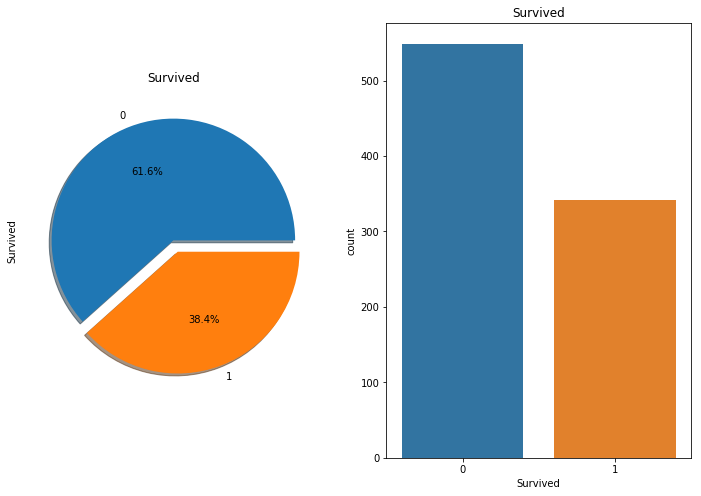

In [101]:
f, ax=plt.subplots(1, 2, figsize=(12,8))
print(f)
print(ax)

# 파이 차트
train_df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')

# CountPlot
sns.countplot('Survived', data=train_df, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

## 2.3 성별로 생존/사망 수를 시각화
※ 데이터 연관관계 분석

남자의 사망률(라벨:0)은 80%가 넘지만, 여자의 사망률은 75%가 넘지 않는다.

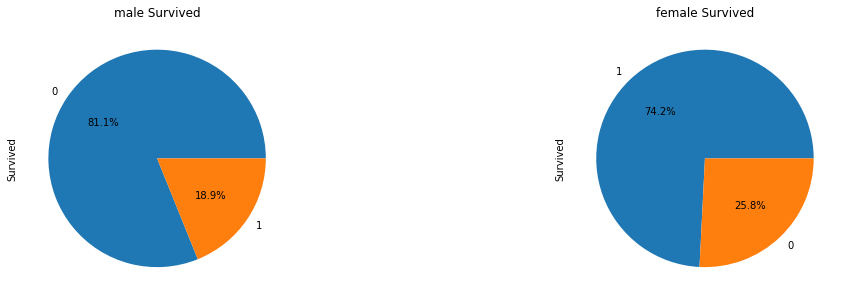

In [102]:
f, ax = plt.subplots(1, 2, figsize=(18,5))
train_df['Survived'][train_df['Sex']=='male'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('male Survived')
train_df['Survived'][train_df['Sex']=='female'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[1].set_title('female Survived')

plt.show()

## 2.4 시각화 함수 생성

In [103]:
def bar_chart(feature):  
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    
    # f, ax = plt.subplots(1, 2, figsize=(15, 5))
    # survived.plot.pie(explode=[0, 0.1],autopct='%1.1f%%', ax=ax[0])
    #dead.plot.pie(autopct='%1.1f%%', ax=ax[1])
    
    #plt.show()
    
    df = pd.DataFrame([survived, dead])
    df.index = ['survived', 'dead']
    df.plot(kind='bar', stacked=True, figsize=(5,5))

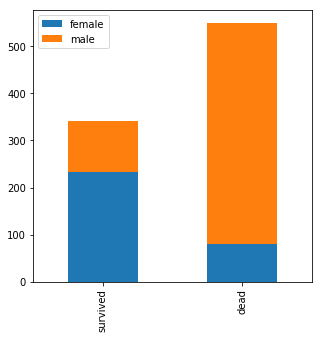

In [104]:
# 성별
# 남자가 여자보다 더 많이 죽음
bar_chart('Sex')

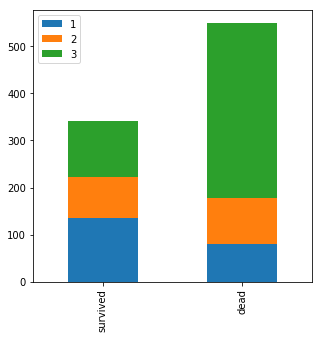

In [105]:
# 티겟 등급
# 티켓 3등급 좌석의 사람이 제일 많이 죽음
bar_chart('Pclass')

# 3. 특성 공학(Feature enginnering)

In [106]:
# 5번째 줄 Age가 null이다.
train_df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


## 3.1 이름 특성 공학
사람 이름은 생존여부에 상관이 없지만, 남자, 미혼 여자, 결혼한 여자의 생존여부는 분석할 필요가 있다.

In [107]:
train_test_data = [train_df, test_df]

#새로운 Series 생성
#Series 이름은 Title
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([a-zA-Z]+)\.', expand=True)

In [108]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [109]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Capt          1
Sir           1
Don           1
Jonkheer      1
Lady          1
Mme           1
Countess      1
Name: Title, dtype: int64

In [110]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

# 3.1.1 데이터 매핑
Mr: 0 <br/>
Miss: 1 <br/>
Mrs: 2 <br/>
Other: 3 <br/>

In [111]:
# 딕셔너리 선언
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

# Series 데이터 타입에 map이라는 함수가 있는 것 같다. 
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [112]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# 3.1.2 시각화
남자는 많이 사망했지만, 여자는 남자보다 덜 사망했다.
예측하기 위한 매우 좋은 데이터이다.

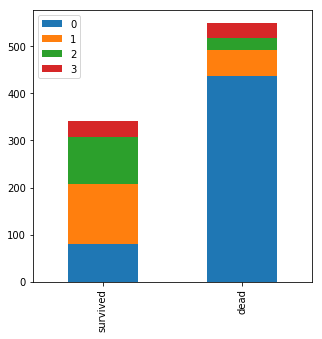

In [113]:
# 변형한 데이터의 시각화
bar_chart('Title')

In [114]:
train_df.drop('Name', axis=1, inplace=True)

In [115]:
test_df.drop('Name', axis=1, inplace=True)

In [116]:
# Name필드가 사라진 것을 확인
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


# 3.2 성별 특성 공학

# 3.2.1 성별을 남자:0, 여성:1로 변환

In [117]:
sex_mapping = {"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [118]:
# 성별이 매핑되었는지 확인
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


# 3.2.2 변형화 된 성별 데이터 시각화

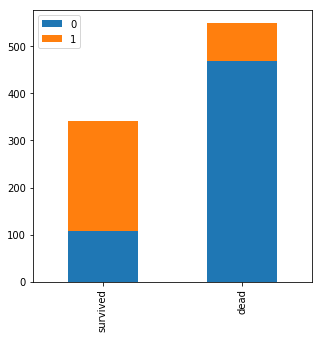

In [119]:
bar_chart('Sex')

# 3.3 Age

In [120]:
train_df.groupby('Title')['Age'].transform('median')

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
5      30.0
6      30.0
7       9.0
8      35.0
9      35.0
10     21.0
11     21.0
12     30.0
13     30.0
14     21.0
15     35.0
16      9.0
17     30.0
18     35.0
19     35.0
20     30.0
21     30.0
22     21.0
23     30.0
24     21.0
25     35.0
26     30.0
27     30.0
28     21.0
29     30.0
       ... 
861    30.0
862    35.0
863    21.0
864    30.0
865    35.0
866    21.0
867    30.0
868    30.0
869     9.0
870    30.0
871    35.0
872    30.0
873    30.0
874    35.0
875    21.0
876    30.0
877    30.0
878    30.0
879    35.0
880    35.0
881    30.0
882    21.0
883    30.0
884    30.0
885    35.0
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

faceting kaggle 예제 <br/>
https://www.kaggle.com/residentmario/faceting-with-seaborn <br/>
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html <br/>
https://jovianlin.io/data-visualization-seaborn-part-3/ <br/>

커널밀도 차트: https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/ <br/>

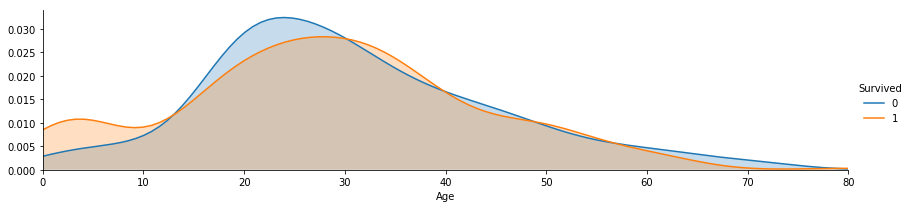

In [121]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()

plt.show()

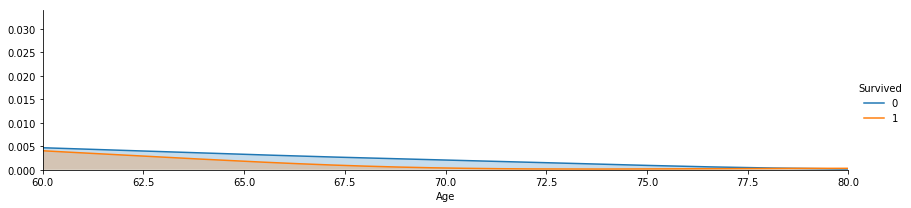

In [122]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()

# 60살이후
plt.xlim(60)
plt.show()

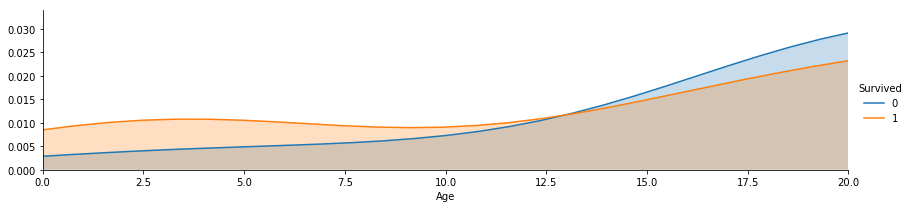

In [123]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()

# 20살까지
plt.xlim(0, 20)
plt.show()

# 3.3.1 나이별로 그룹화 후 분석(Binning)
Dataframe.loc 문서: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

In [124]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=16, 'Age'] = 0,
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26), 'Age'] = 1, 
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36), 'Age'] = 2,
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62), 'Age'] = 3, 
    dataset.loc[dataset['Age']>62, 'Age'] = 4

In [125]:
#변경된 데이터 확인
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


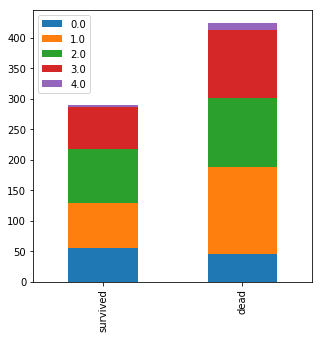

In [126]:
bar_chart('Age')

# 3.4 Embarked
배를 어디서 탔는지

In [127]:
# 티켓 필드 고유 값
train_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [146]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [128]:
# 승선 장소 고유 값
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

3번째 티켓을 가진 사람이 많이 탔다. <br/>
3번째 클래스에 탄 사람 중 가장 많이 탄 곳은 S장소 이다.

모든 티켓의 사람은 S장소에 가장 많이 탔다.(과반수) -> 그러므로 Embarked가 NULL값을 'S'로 변경했다.

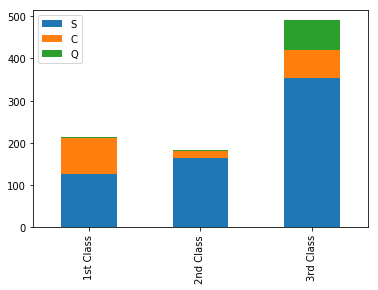

In [129]:
pclass1 = train_df[train_df['Pclass']==1]['Embarked'].value_counts()
pclass2 = train_df[train_df['Pclass']==2]['Embarked'].value_counts()
pclass3 = train_df[train_df['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([pclass1, pclass2, pclass3])
df.index = ['1st Class', '2nd Class', '3rd Class']
df.plot(kind='bar', stacked=True)

In [130]:
# NULL값을 S로 초기화 한다.
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

# 3.5 Fare
요금은 티켓 등급에 따라 가격이 달라진다. 그러므로 티켓 등급의 중간 값을 채운다.

In [131]:
train_df['Fare'].fillna(train_df.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test_df['Fare'].fillna(test_df.groupby('Pclass')['Fare'].transform('median'), inplace=True)

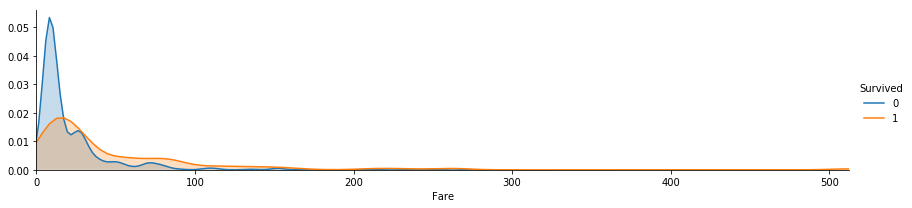

In [141]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4) # y축 값 유형 지정
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=[0, train_df['Fare'].max()]) # x축 값 설정
facet.add_legend() # 라벨

In [142]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=17, 'Fare'] = 0,
    dataset.loc[ (dataset['Fare'] > 17) & (dataset['Fare'] <=30 ), 'Fare'] = 1,
    dataset.loc[ (dataset['Fare'] > 30) & (dataset['Fare'] <=100 ), 'Fare'] = 2,
    dataset.loc[ (dataset['Fare'] > 100), 'Fare'] = 3

In [144]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,S,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,S,0


# 3.6 Cabin
호텔방

In [145]:
train_df['Cabin'].value_counts()

G6                 4
C23 C25 C27        4
B96 B98            4
C22 C26            3
D                  3
E101               3
F2                 3
F33                3
C92                2
B18                2
C78                2
D17                2
C2                 2
C65                2
E44                2
B22                2
E8                 2
B28                2
B57 B59 B63 B66    2
B5                 2
F4                 2
D26                2
E24                2
D36                2
D33                2
B35                2
C125               2
B51 B53 B55        2
C124               2
E67                2
                  ..
E12                1
D28                1
C54                1
D47                1
E31                1
C82                1
D49                1
E36                1
B86                1
E34                1
D7                 1
D10 D12            1
D19                1
C103               1
E63                1
C62 C64            1
A7           

In [148]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

티켓 1클래스에서 호텔이 많다

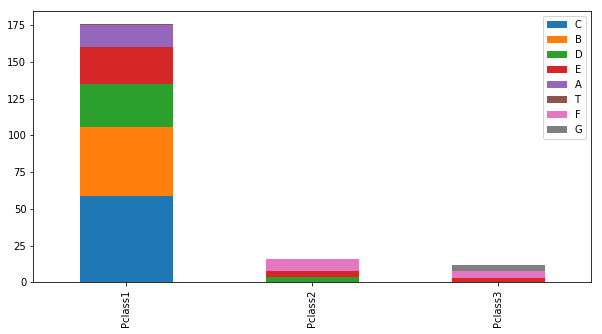

In [156]:
Pclass1 = train_df[train_df['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train_df[train_df['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train_df[train_df['Pclass']==3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ('Pclass1', 'Pclass2', 'Pclass3')
df.plot(kind='bar', stacked=True, figsize=(10, 5))

# 3.7 Feature scaling
유클리언드 디스턴스 방법 사용 <br/>
등급 차이는 1등급 차이밖에 나지 않지만 숫자 값으로 고려하면 10차이 이상이 나므로 <br/>
소수점을 사용해서 차이를 줄인다.

In [157]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [158]:
train_df["Cabin"].fillna(train_df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_df["Cabin"].fillna(test_df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

# FamilySize
혼자 탔는지 2인 이상 탔는지로 구분 <br/>
SibSp: 형제,자매 <br/>
Parch: 가족

In [159]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,S,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,S,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,S,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,S,0


In [160]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']

혼자 있을 때 죽을 확률이 높다

(0, 10.0)

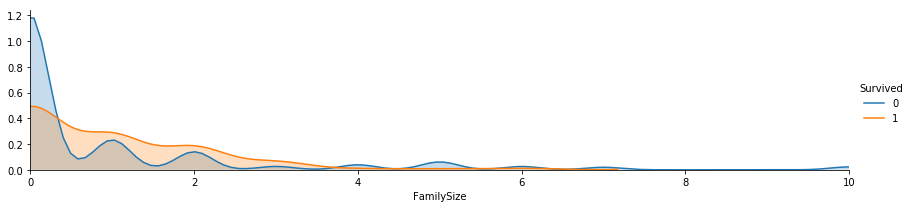

In [166]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train_df['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [167]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [173]:
# 3.8 쓸모없는 데이터 제거

In [174]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,S,0,0.0
1,1,1,1,3.0,2.0,0.8,C,2,0.0
2,1,3,1,1.0,0.0,2.0,S,1,NaN
3,1,1,1,2.0,2.0,0.8,S,2,0.0
4,0,3,0,2.0,0.0,2.0,S,0,NaN


In [175]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train_df = train_df.drop(features_drop, axis=1)
test_df = test_df.drop(features_drop, axis=1)
train_df= train_df.drop(['PassengerId'], axis=1)

KeyError: "['Ticket' 'SibSp' 'Parch'] not found in axis"

In [176]:
# 특성 공학 끝
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,S,0,0.0
1,1,1,1,3.0,2.0,0.8,C,2,0.0
2,1,3,1,1.0,0.0,2.0,S,1,NaN
3,1,1,1,2.0,2.0,0.8,S,2,0.0
4,0,3,0,2.0,0.0,2.0,S,0,NaN
